# **Computação Visual**
*João Pedro Bianchini Ramos - 32087411*

*Victor Costa Nova Alexandre - 32052960*

*Lucas Tonin Leite - 32089759*

# Exercícios

Inclua um exemplo de código que exemplifica cada tarefa e uma imagem resultante do código (por exemplo, no item 2, a imagem deve conter a imagem em tons de cinza e o histograma da imagem).

## **1.**
Realizar a limiarização de uma imagem usando Python e scikit-image.



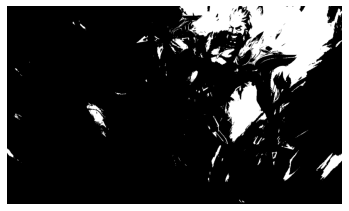

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from skimage.filters import threshold_otsu
from skimage.color import rgb2gray

# Carregar a imagem
image = io.imread('Draven.jpg')

# Converter a imagem para escala de cinza
gray_image = rgb2gray(image)

# Calcular o valor de limiar usando o método de Otsu
thresh = threshold_otsu(gray_image)

# Aplicar o limiar para binarizar a imagem
binary_image = gray_image > thresh

# Exibir a imagem binarizada
plt.imshow(binary_image, cmap='gray')
plt.axis('off')
plt.show()



## **2.**

Plotar o histograma de uma imagem tons de cinza usando Python, scikit-image e matplotlib.




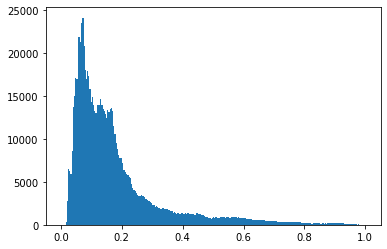

In [ ]:
from skimage import io
import matplotlib.pyplot as plt

img = io.imread('Draven.jpg', as_gray=True)

plt.hist(img.ravel(), bins=256, range=(0, 1))
plt.show()


## **3.**

Plotar o histograma de uma imagem colorida (um histograma por canal de cor) usando Python, scikit-image e matplotlib.



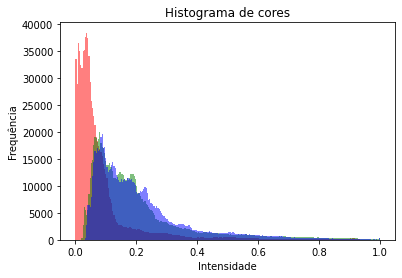

In [ ]:
import matplotlib.pyplot as plt
from skimage import io, color

img = io.imread('Draven.png')
img_rgb = color.rgba2rgb(img)
red_channel = img_rgb[:,:,0]
green_channel = img_rgb[:,:,1]
blue_channel = img_rgb[:,:,2]
plt.hist(red_channel.ravel(), bins=256, color='red', alpha=0.5)
plt.hist(green_channel.ravel(), bins=256, color='green', alpha=0.5)
plt.hist(blue_channel.ravel(), bins=256, color='blue', alpha=0.5)
plt.title('Histograma de cores')
plt.xlabel('Intensidade')
plt.ylabel('Frequência')
plt.show()

## **Exercício 4**




## **Exercício 5**

Na célula a seguir, escreva um código Python que aplica o filtro do exercício 3 em cima da imagem obtida no exercício 4, 10 vezes. Ou seja, o filtro sempre é aplicado no resultado da imagem filtrada.

O resultado do seu código deve ficar parecido com a imagem abaixo:

![Exercício5-Saída.png](Exercício5-Saída.png)

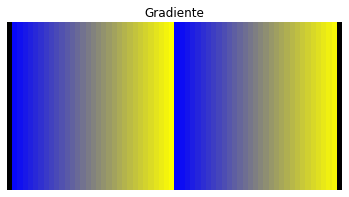

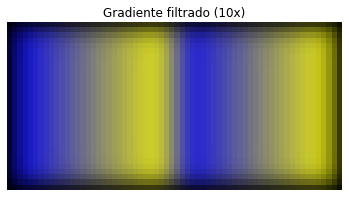

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def lerp(v0, v1, alpha):
    return (1.0 - alpha) * v0 + alpha * v1

def blur3x3(img_color):
    # Definir o kernel do filtro de suavização (blur)
    kernel = np.array([[1, 1, 1],
                       [1, 1, 1],
                       [1, 1, 1]]) / 9

    # Adicionar bordas à imagem
    img_padded = np.pad(img_color, ((1, 1), (1, 1), (0, 0)), mode='constant')

    # Criar uma matriz vazia para o resultado da convolução
    img_result = np.zeros_like(img_color)

    # Aplicar o filtro a cada pixel da imagem
    for i in range(img_color.shape[0]):
        for j in range(img_color.shape[1]):
            region = img_padded[i:i+3, j:j+3, :]
            filtered_region = (region * kernel).sum(axis=(0, 1))
            img_result[i, j, :] = filtered_region

    return img_result

# Definir o tamanho da imagem
width = 64
height = 32

# Criar uma matriz NumPy com valores de 0 a 1
x = np.linspace(0, 1, width).reshape((-1, 1))

# Interpolar as cores
blue = np.array([0, 0, 255], dtype=np.uint8)
yellow = np.array([255, 255, 0], dtype=np.uint8)
colors = (lerp(blue, yellow, x) * 255).astype(np.uint8)

# Adicionar nova dimensão para corresponder a altura
colors = colors[:, np.newaxis, :]

# Criar a imagem
img = Image.fromarray(colors.repeat(height, axis=1).transpose((1, 0, 2)))

# Plotar a imagem original
plt.imshow(img)
plt.title('Gradiente')
plt.axis('off')
plt.show()

# Carregar a imagem filtrada
img_filtered = np.array(img)

# Aplicar o filtro 10 vezes
for i in range(10):
    img_filtered = blur3x3(img_filtered)
    
# Plotar a imagem filtrada 10 vezes
plt.imshow(img_filtered)
plt.title('Gradiente filtrado (10x)')
plt.axis('off')
plt.show()
